In [5]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [6]:
# saving data
profiles = np.loadtxt('WeightDistribution-Continuity-FC-MNIST-Layer1-Activations.txt')

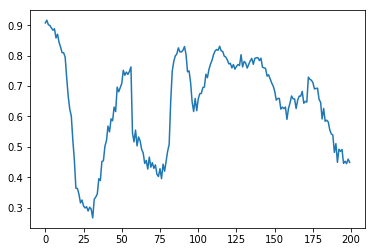

In [36]:
plt.plot(profiles[0])

In [15]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [99]:
# see https://blog.dominodatalab.com/fitting-gaussian-process-models-python/
kernel = Matern(length_scale=10, nu=0.1) + WhiteKernel(noise_level=1)

In [100]:
Xmax = profiles.shape[1]

In [101]:
X = np.reshape(range(Xmax), (-1, 1))
y = profiles[0]

In [102]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=Matern(length_scale=10, nu=0.1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [103]:
gp.kernel_

Matern(length_scale=1e+05, nu=0.1)

<ErrorbarContainer object of 3 artists>

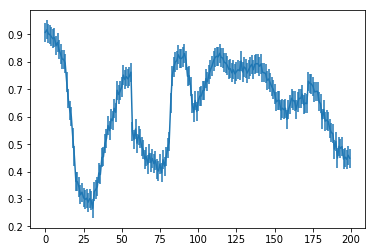

In [104]:
y_pred, sigma = gp.predict(X, return_std=True)
plt.errorbar(X, y_pred, yerr=sigma, capsize=0)

In [105]:
# TODO: how to fit the whole thing?

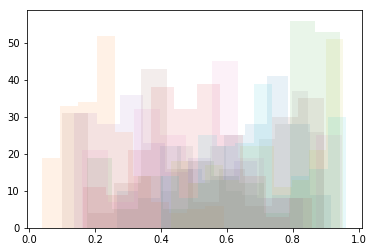

In [113]:
for prof in profiles:
    plt.hist(prof, alpha = 0.1)

In [ ]:
# they are quite different... How to make it better?